In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium',
         'font.family': 'sans-serif',
         'text.usetex': True}
rcParams.update(params)

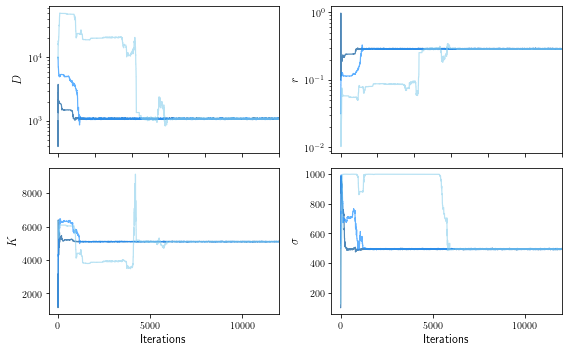

In [2]:
c1 = np.load('linear_chains_1.npy',allow_pickle = True).item()
c2 = np.load('linear_chains_2.npy',allow_pickle = True).item()
c3 = np.load('linear_chains_3.npy',allow_pickle = True).item()

its = [i for i in range(len(c1.trace_x[0][:,0]))]

chains = [c1,c2,c3]
colors = ['steelblue','dodgerblue','skyblue']
alphas = [.95,.7,.6]

fig,ax = plt.subplots(2,2,figsize = (8,5))
for i in range(3):
    ax[0,0].plot(its,10**chains[i].trace_x[0][:,0]*1e6, color = colors[i],alpha = alphas[i],lw = 1.2)
    ax[0,1].plot(its,10**chains[i].trace_x[0][:,1], color = colors[i],alpha = alphas[i],lw = 1.2)
    ax[1,0].plot(its,10**chains[i].trace_x[0][:,2], color = colors[i],alpha = alphas[i],lw = 1.2)
    ax[1,1].plot(its,10**chains[i].trace_x[0][:,3], color = colors[i],alpha = alphas[i],lw = 1.2)

for i in range(2):
    ax[0,i].set_yscale('log')
    ax[0,i].set_xticklabels([])
    ax[1,i].set_xticks([0,5000,10000])
    for j in range(2):
        ax[i,j].set_xlim(-500,its[-1])

ax[0,0].set_ylabel('$D$')
ax[0,1].set_ylabel('$r$')
ax[1,0].set_ylabel('$K$')
ax[1,1].set_ylabel('$\\sigma$')
ax[1,1].set_xlabel('Iterations')
ax[1,0].set_xlabel('Iterations')
plt.tight_layout()
#plt.savefig('chains_linear.pdf')
plt.show()

In [5]:
conc_chain = np.concatenate([c1.trace_x[0][2000:],c2.trace_x[0][2000:],c2.trace_x[0][7000:]])
conc_chain = 10**conc_chain
conc_chain[:,0]*=1e6

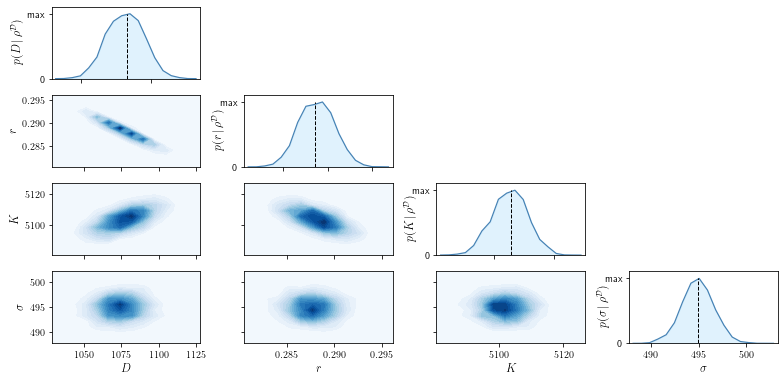

In [6]:
optim = np.load('optimisation_linear.npy',allow_pickle = True) # Results from likelihood optim
params = 10**np.array([o.x for o in optim])
params[:,0]*=1e6

fig,ax = plt.subplots(4,4,figsize = (11,5.4))
for i in range(1,4):
    for j in range(i):
        #ax[i,j].hist2d(conc_chain[:,i],conc_chain[:,j],50,cmap = 'Greys')
        ax[j,i].axis('off')
        dens2,binsx,binsy = np.histogram2d(conc_chain[:,j],conc_chain[:,i], bins = [14,14], range = [[lims[j][0],lims[j][1]],[lims[i][0],lims[i][1]]])
        X,Y = np.meshgrid(binsx[:-1],binsy[:-1])
        ax[i,j].contourf(X,Y,dens2,20,cmap = 'Blues')
        if i < 3:
            ax[i,j].set_xticklabels([])
        if j > 0:
            ax[i,j].set_yticklabels([])
ax[1,0].set_ylabel('$r$')
ax[2,0].set_ylabel('$K$')
ax[3,0].set_ylabel('$\\sigma$')
ax[0,0].set_ylabel('$p(D\,|\,\\rho^\mathcal{D})$')
#ax[0,0].set_ylabel('$D$')
ax[1,1].set_ylabel('$p(r\,|\,\\rho^\mathcal{D})$',labelpad = -4)
ax[2,2].set_ylabel('$p(K\,|\,\\rho^\mathcal{D})$',labelpad = -4)
ax[3,3].set_ylabel('$p(\\sigma\,|\,\\rho^\mathcal{D})$',labelpad = -4)

ax[-1,1].set_xlabel('$r$')
ax[-1,2].set_xlabel('$K$')
ax[-1,3].set_xlabel('$\\sigma$')
ax[-1,0].set_xlabel('$D$')
        
for i in range(4):
    dens,bins = np.histogram(conc_chain[:,i],bins = 18, range = (lims[i][0],lims[i][1]))
    ax[i,i].plot(.5*(bins[1:] + bins[:-1]),dens, color = 'steelblue',lw = 1.2)
    ax[i,i].plot([params[0,i],params[0,i]],[0,np.max(dens)],lw = 1,color = 'black',linestyle = '--')
    if i < 3:
        ax[i,i].set_xticklabels([])
    ax[i,i].set_yticks([0,np.max(dens)])
    ax[i,i].set_yticklabels([0,'max'])
    ax[i,i].fill_between(.5*(bins[1:] + bins[:-1]),dens, color = 'lightskyblue',alpha = .25)
    ax[i,i].set_xlim(lims[i][0],lims[i][1])
    ax[i,i].set_ylim(0,np.max(dens)*1.11)
    #ax[i,i].hist(conc_chain[:,i],15,color = 'lightskyblue',edgecolor = 'white')
plt.tight_layout()

#plt.savefig('MCMC_linear.pdf')
plt.show()